# Predicting Single Family Homes Values in the Southern Neighborhoods of Staten Island

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import math
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('nyc-rolling-sales.csv')

#Borough 1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, 5= Staten Island
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
data.shape

(84548, 22)

In [4]:
#convert Sale Price, Gross Sq Ft, Land Sq Ft to integer
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

In [5]:
#remove NAN from above
data=data.dropna()

In [6]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


In [7]:
Filter1 =  data['BOROUGH']==5 #Staten Island
Filter2 = data['SALE PRICE'] >= 10000 #Filter down Sales Price
Filter3 = data['SALE PRICE'] < 1000000
Filter4 = data['GROSS SQUARE FEET'] < 5000 #Filter down house gross sf

Filter_BldgClassCat = data['BUILDING CLASS CATEGORY'].str.contains('01') #filters to keep only single family dwellings

data_filtered = data[Filter1 & Filter2 & Filter3 & Filter4]
data_filtered2 = data_filtered[Filter_BldgClassCat]


C:\Users\mvesc\AppData\Local\Temp/ipykernel_25724/3036627384.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered2 = data_filtered[Filter_BldgClassCat]


In [8]:
data_filtered2['NEIGHBORHOOD'].unique()

array(['ANNADALE', 'ARDEN HEIGHTS', 'ARROCHAR', 'ARROCHAR-SHORE ACRES',
       'BULLS HEAD', 'CASTLETON CORNERS', 'CLOVE LAKES', 'CONCORD',
       'CONCORD-FOX HILLS', 'DONGAN HILLS', 'DONGAN HILLS-COLONY',
       'DONGAN HILLS-OLD TOWN', 'ELTINGVILLE', 'EMERSON HILL',
       'FRESH KILLS', 'GRANT CITY', 'GRASMERE', 'GREAT KILLS',
       'GREAT KILLS-BAY TERRACE', 'GRYMES HILL', 'HUGUENOT', 'LIVINGSTON',
       'MANOR HEIGHTS', 'MARINERS HARBOR', 'MIDLAND BEACH',
       'NEW BRIGHTON', 'NEW DORP', 'NEW DORP-BEACH', 'NEW DORP-HEIGHTS',
       'NEW SPRINGVILLE', 'OAKWOOD', 'OAKWOOD-BEACH', 'PLEASANT PLAINS',
       'PORT IVORY', 'PORT RICHMOND', 'PRINCES BAY', 'RICHMONDTOWN',
       'RICHMONDTOWN-LIGHTHS HILL', 'ROSEBANK', 'ROSSVILLE',
       'ROSSVILLE-CHARLESTON', 'ROSSVILLE-RICHMOND VALLEY', 'SILVER LAKE',
       'SOUTH BEACH', 'STAPLETON', 'STAPLETON-CLIFTON', 'SUNNYSIDE',
       'TODT HILL', 'TOMPKINSVILLE', 'TOTTENVILLE', 'TRAVIS',
       'WEST NEW BRIGHTON', 'WESTERLEIGH', 'WILLOW

In [9]:
nbhood_south = ['TOTTENVILLE', 'ROSSVILLE', 'PLEASANT PLAINS', 'PRINCES BAY', 'ANNADALE'] 

In [10]:
data_ready_filt = data_filtered2[data['NEIGHBORHOOD'].isin(nbhood_south)] #filter to only selected neighborhoods
data_ready_filt=data_ready_filt.dropna()
data_ready_filt.head()

C:\Users\mvesc\AppData\Local\Temp/ipykernel_25724/88860996.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ready_filt = data_filtered2[data['NEIGHBORHOOD'].isin(nbhood_south)] #filter to only selected neighborhoods


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76139,5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00
76141,7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00
76143,9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,10312,1,0,1,1508.0,1521.0,1986,1,A5,370000.0,2016-10-14 00:00:00
76144,10,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,10312,1,0,1,1550.0,1521.0,1986,1,A5,439000.0,2017-06-29 00:00:00
76145,11,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,10312,1,0,1,1800.0,1320.0,1986,1,A5,300000.0,2017-06-30 00:00:00


In [11]:
#drop cols that provide no value for regression
data_ready = data_ready_filt.drop(columns=['SALE DATE','TAX CLASS AT TIME OF SALE','Unnamed: 0','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'BOROUGH', 'BUILDING CLASS AT PRESENT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'])
print(data_ready.shape)
data_ready.head()

(286, 9)


,NEIGHBORHOOD,BLOCK,LOT,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE
76139,ANNADALE,6205,22,10312,1546.0,1579.0,1986,A5,437500.0
76141,ANNADALE,6209,69,10312,2665.0,1592.0,2007,A5,579000.0
76143,ANNADALE,6211,15,10312,1508.0,1521.0,1986,A5,370000.0
76144,ANNADALE,6211,34,10312,1550.0,1521.0,1986,A5,439000.0
76145,ANNADALE,6211,40,10312,1800.0,1320.0,1986,A5,300000.0


In [12]:
data_ready.nunique()

NEIGHBORHOOD                        5
BLOCK                             165
LOT                               145
ZIP CODE                            3
LAND SQUARE FEET                  205
GROSS SQUARE FEET                 196
YEAR BUILT                         50
BUILDING CLASS AT TIME OF SALE      7
SALE PRICE                        191
dtype: int64

In [13]:
#remove uncommon building classes
data_ready = data_ready.drop(data_ready[data_ready['BUILDING CLASS AT TIME OF SALE']=='A0'].index, axis=0)
data_ready = data_ready.drop(data_ready[data_ready['BUILDING CLASS AT TIME OF SALE']=='A6'].index, axis=0)
data_ready = data_ready.drop(data_ready[data_ready['BUILDING CLASS AT TIME OF SALE']=='S1'].index, axis=0)

In [14]:
data_ready.nunique()

NEIGHBORHOOD                        5
BLOCK                             164
LOT                               143
ZIP CODE                            3
LAND SQUARE FEET                  201
GROSS SQUARE FEET                 194
YEAR BUILT                         49
BUILDING CLASS AT TIME OF SALE      4
SALE PRICE                        190
dtype: int64

## End of Data Cleaning

In [15]:
df1 = data_ready.copy()

In [16]:
df1 = df1.drop(columns = ['BLOCK','LOT', 'YEAR BUILT'])

In [17]:
df1 = pd.get_dummies(df1, columns=['NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'ZIP CODE'])

In [18]:
df1.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_PLEASANT PLAINS,NEIGHBORHOOD_PRINCES BAY,NEIGHBORHOOD_ROSSVILLE,NEIGHBORHOOD_TOTTENVILLE,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A5,ZIP CODE_10307,ZIP CODE_10309,ZIP CODE_10312
76139,1546.0,1579.0,437500.0,1,0,0,0,0,0,0,0,1,0,0,1
76141,2665.0,1592.0,579000.0,1,0,0,0,0,0,0,0,1,0,0,1
76143,1508.0,1521.0,370000.0,1,0,0,0,0,0,0,0,1,0,0,1
76144,1550.0,1521.0,439000.0,1,0,0,0,0,0,0,0,1,0,0,1
76145,1800.0,1320.0,300000.0,1,0,0,0,0,0,0,0,1,0,0,1


In [19]:
#check to see how many values for dummy columns
df1.sum()

LAND SQUARE FEET                       1190162.0
GROSS SQUARE FEET                       498464.0
SALE PRICE                           148543072.0
NEIGHBORHOOD_ANNADALE                       64.0
NEIGHBORHOOD_PLEASANT PLAINS                26.0
NEIGHBORHOOD_PRINCES BAY                    42.0
NEIGHBORHOOD_ROSSVILLE                      61.0
NEIGHBORHOOD_TOTTENVILLE                    88.0
BUILDING CLASS AT TIME OF SALE_A1          105.0
BUILDING CLASS AT TIME OF SALE_A2           35.0
BUILDING CLASS AT TIME OF SALE_A3           15.0
BUILDING CLASS AT TIME OF SALE_A5          126.0
ZIP CODE_10307                              88.0
ZIP CODE_10309                             123.0
ZIP CODE_10312                              70.0
dtype: float64

<AxesSubplot:>

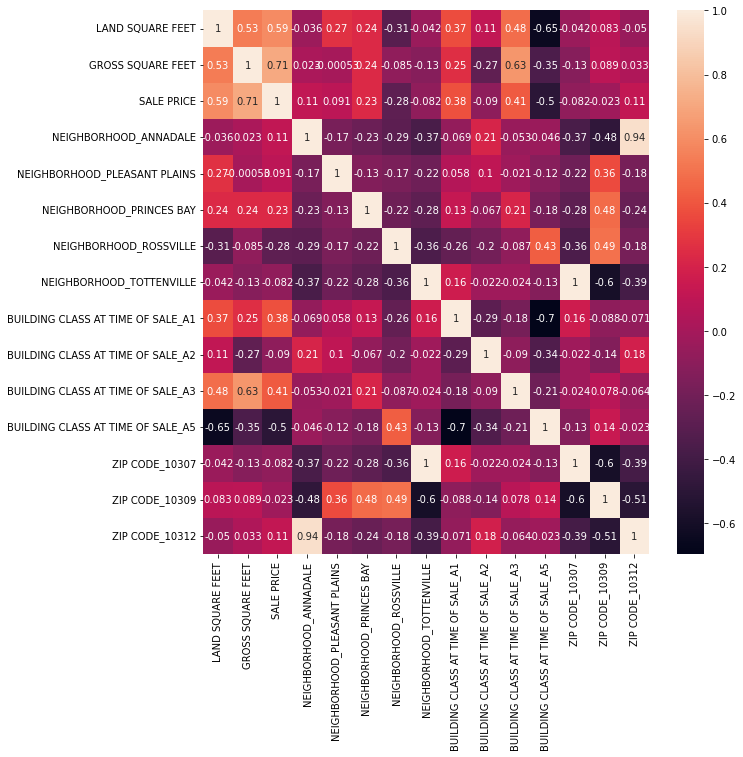

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df1.corr(), annot=True)

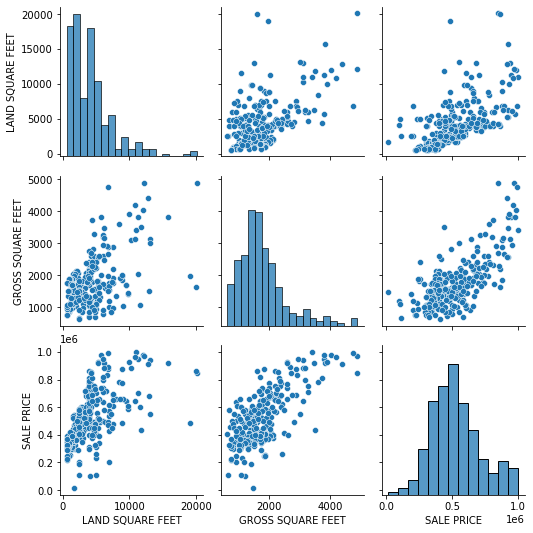

In [21]:
#check correlation types between variables
sns.pairplot(data=df1[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']])
#Appears the relationship between Sale Price and Gross Square Feet is linear

## OLS Linear Regression

In [22]:
df1.columns

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE',
       'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_PLEASANT PLAINS',
       'NEIGHBORHOOD_PRINCES BAY', 'NEIGHBORHOOD_ROSSVILLE',
       'NEIGHBORHOOD_TOTTENVILLE', 'BUILDING CLASS AT TIME OF SALE_A1',
       'BUILDING CLASS AT TIME OF SALE_A2',
       'BUILDING CLASS AT TIME OF SALE_A3',
       'BUILDING CLASS AT TIME OF SALE_A5', 'ZIP CODE_10307', 'ZIP CODE_10309',
       'ZIP CODE_10312'],
      dtype='object')

In [23]:
#need to account for dummy column trap. remove certain columns
X=df1[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_PLEASANT PLAINS',
       'NEIGHBORHOOD_PRINCES BAY', 'NEIGHBORHOOD_ROSSVILLE', 'BUILDING CLASS AT TIME OF SALE_A1',
       'BUILDING CLASS AT TIME OF SALE_A3',
       'BUILDING CLASS AT TIME OF SALE_A5', 'ZIP CODE_10307',
       'ZIP CODE_10312']]
y=df1['SALE PRICE']

In [24]:
X.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_PLEASANT PLAINS,NEIGHBORHOOD_PRINCES BAY,NEIGHBORHOOD_ROSSVILLE,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A5,ZIP CODE_10307,ZIP CODE_10312
76139,1546.0,1579.0,1,0,0,0,0,0,1,0,1
76141,2665.0,1592.0,1,0,0,0,0,0,1,0,1
76143,1508.0,1521.0,1,0,0,0,0,0,1,0,1
76144,1550.0,1521.0,1,0,0,0,0,0,1,0,1
76145,1800.0,1320.0,1,0,0,0,0,0,1,0,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c)
result = model.fit()
print(result.summary())
X_test_c = sm.add_constant(X_test)

                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     27.41
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           4.42e-31
Time:                        14:57:59   Log-Likelihood:                -2452.7
No. Observations:                 188   AIC:                             4927.
Df Residuals:                     177   BIC:                             4963.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [26]:
RMSE = math.sqrt(mean_squared_error(y_true= y_test , y_pred=result.predict(X_test_c)))
RMSE

126301.79497708404

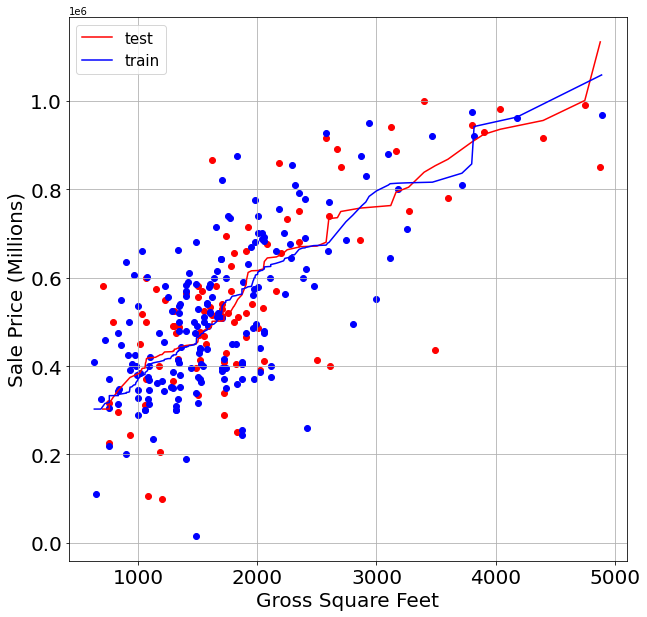

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
plt.xticks(ticks=None, labels=None, rotation=0)
plt.xticks(fontsize=20 ) 
plt.yticks(fontsize=20 ) 


plt.subplot(1,1,1)
plt.plot(X_test_c['GROSS SQUARE FEET'].sort_values(), result.predict(X_test_c).sort_values(), color='r', label="test")
plt.scatter(X_test_c['GROSS SQUARE FEET'], y_test, color='r')
plt.plot(X_train_c['GROSS SQUARE FEET'].sort_values(), result.predict(X_train_c).sort_values(), color='b', label="train")
plt.scatter(X_train_c['GROSS SQUARE FEET'], y_train, color='b')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Gross Square Feet', fontsize=20)

plt.legend(fontsize=15)
plt.grid(axis='both')

## Random Forest Regressor

In [28]:
df2 = df1.copy()

In [29]:
X_rf = df2[['LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_PLEASANT PLAINS',
       'NEIGHBORHOOD_PRINCES BAY', 'NEIGHBORHOOD_ROSSVILLE',
       'NEIGHBORHOOD_TOTTENVILLE', 'BUILDING CLASS AT TIME OF SALE_A1',
       'BUILDING CLASS AT TIME OF SALE_A2',
       'BUILDING CLASS AT TIME OF SALE_A3',
       'BUILDING CLASS AT TIME OF SALE_A5', 'ZIP CODE_10307', 'ZIP CODE_10309',
       'ZIP CODE_10312']]
y_rf = df2['SALE PRICE']

In [30]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.33, random_state=324)

rf_reg = RandomForestRegressor(n_estimators = 100, random_state=123)
rf_reg.fit(X_rf_train.values, y_rf_train.values)

RandomForestRegressor(random_state=123)

In [31]:
rf_reg.score(X_rf_test.values, y_rf_test.values)

0.5913654108260036

In [32]:
RMSE_rf = math.sqrt(mean_squared_error(y_true= y_rf_test , y_pred=rf_reg.predict(X_rf_test)))
RMSE_rf

C:\Users\mvesc\anaconda3\envs\geospatial\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


129193.09971625633

C:\Users\mvesc\anaconda3\envs\geospatial\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


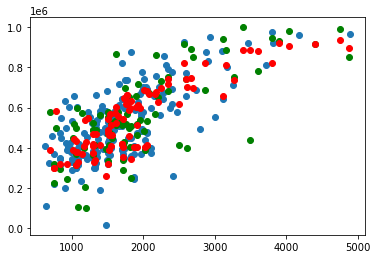

In [33]:
plt.scatter(X_rf_train['GROSS SQUARE FEET'], y_rf_train)
plt.scatter(X_rf_test['GROSS SQUARE FEET'], y_rf_test, color='g')

plt.scatter(X_rf_test['GROSS SQUARE FEET'], rf_reg.predict(X_rf_test), color='r')

### Results: OLS Linear Regression provided lower RMSE than Random Forest Regression

## Cluster Analysis for Any Additional Insights

In [34]:
from sklearn.cluster import KMeans

In [35]:
df1.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_PLEASANT PLAINS,NEIGHBORHOOD_PRINCES BAY,NEIGHBORHOOD_ROSSVILLE,NEIGHBORHOOD_TOTTENVILLE,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A5,ZIP CODE_10307,ZIP CODE_10309,ZIP CODE_10312
76139,1546.0,1579.0,437500.0,1,0,0,0,0,0,0,0,1,0,0,1
76141,2665.0,1592.0,579000.0,1,0,0,0,0,0,0,0,1,0,0,1
76143,1508.0,1521.0,370000.0,1,0,0,0,0,0,0,0,1,0,0,1
76144,1550.0,1521.0,439000.0,1,0,0,0,0,0,0,0,1,0,0,1
76145,1800.0,1320.0,300000.0,1,0,0,0,0,0,0,0,1,0,0,1


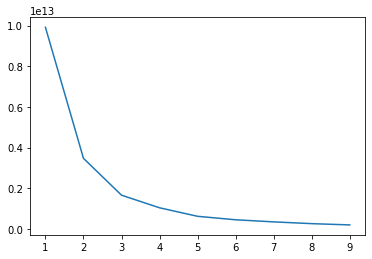

In [36]:
df = df1.copy()
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 20)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.show()

In [37]:
#select n=5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(df)

In [38]:
df['cluster_number'] = y_kmeans
df.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_PLEASANT PLAINS,NEIGHBORHOOD_PRINCES BAY,NEIGHBORHOOD_ROSSVILLE,NEIGHBORHOOD_TOTTENVILLE,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A5,ZIP CODE_10307,ZIP CODE_10309,ZIP CODE_10312,cluster_number
76139,1546.0,1579.0,437500.0,1,0,0,0,0,0,0,0,1,0,0,1,2
76141,2665.0,1592.0,579000.0,1,0,0,0,0,0,0,0,1,0,0,1,1
76143,1508.0,1521.0,370000.0,1,0,0,0,0,0,0,0,1,0,0,1,2
76144,1550.0,1521.0,439000.0,1,0,0,0,0,0,0,0,1,0,0,1,2
76145,1800.0,1320.0,300000.0,1,0,0,0,0,0,0,0,1,0,0,1,2


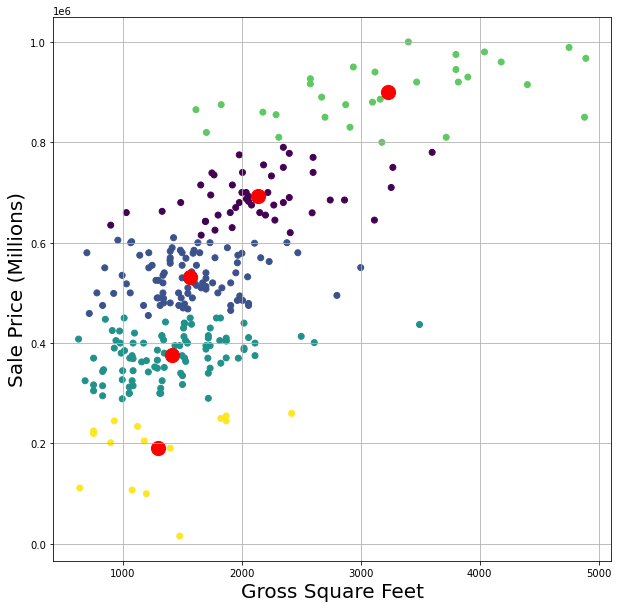

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], c=df['cluster_number'])
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=200, c='red')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Gross Square Feet', fontsize=20)
plt.grid(axis='both')

## Geospatial Analysis

### Geolocate Addresses to Visualize Geography for Insights

In [40]:
data_ready_filt.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76139,5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00
76141,7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00
76143,9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,10312,1,0,1,1508.0,1521.0,1986,1,A5,370000.0,2016-10-14 00:00:00
76144,10,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,10312,1,0,1,1550.0,1521.0,1986,1,A5,439000.0,2017-06-29 00:00:00
76145,11,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,10312,1,0,1,1800.0,1320.0,1986,1,A5,300000.0,2017-06-30 00:00:00


In [41]:
from geopy.geocoders import Nominatim, GoogleV3

In [42]:
data_ready_geo = data_ready_filt.copy()

In [43]:
data_ready_geo = data_ready_geo.reset_index()
data_ready_geo.head()

,index,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,76139,5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00
1,76141,7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00
2,76143,9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,10312,1,0,1,1508.0,1521.0,1986,1,A5,370000.0,2016-10-14 00:00:00
3,76144,10,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,10312,1,0,1,1550.0,1521.0,1986,1,A5,439000.0,2017-06-29 00:00:00
4,76145,11,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,10312,1,0,1,1800.0,1320.0,1986,1,A5,300000.0,2017-06-30 00:00:00


In [44]:
# combine columns to get full address for input into Nominatim
data_ready_geo['ADDRESS-FULL'] = data_ready_geo['ADDRESS'].str.cat(data_ready_geo['ZIP CODE'].astype(str), sep=' ')

In [45]:
#instanciate class
geolocator = Nominatim(user_agent = 'my_app3')

In [46]:
#create empty cols for future data
data_ready_geo['LATITUDE']=""

In [47]:
data_ready_geo['LONGITUDE']=""

In [48]:
#pull lat/long for each address and insert into df.
#try / except for errors where the address is not locatable.

for i in range(0,len(data_ready_geo)):
    geo = geolocator.geocode(data_ready_geo['ADDRESS-FULL'].iloc[i])
    try:
        data_ready_geo['LATITUDE'].iloc[i] = geo.point.latitude
        data_ready_geo['LONGITUDE'].iloc[i] = geo.point.longitude
    except AttributeError:
        data_ready_geo['LATITUDE'].iloc[i] = 'NA'
        data_ready_geo['LONGITUDE'].iloc[i] = 'NA'

C:\Users\mvesc\anaconda3\envs\geospatial\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
pd.set_option('display.max_rows', None)

data_ready_geo

,index,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,ADDRESS-FULL,LATITUDE,LONGITUDE
0,76139,5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00,83 EAGAN AVENUE 10312,40.539525,-74.17302
1,76141,7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00,195 MOSELY AVENUE 10312,40.541459,-74.169436
2,76143,9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,10312,1,0,1,1508.0,1521.0,1986,1,A5,370000.0,2016-10-14 00:00:00,17 EAGAN AVENUE 10312,40.540551,-74.173647
3,76144,10,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,10312,1,0,1,1550.0,1521.0,1986,1,A5,439000.0,2017-06-29 00:00:00,100 SEGUINE PLACE 10312,40.540512,-74.172856
4,76145,11,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,10312,1,0,1,1800.0,1320.0,1986,1,A5,300000.0,2017-06-30 00:00:00,92 SEGUINE PLACE 10312,40.540484,-74.172839
5,76147,13,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6212,59,,A5,91 LORRAINE AVENUE,,10312,1,0,1,1650.0,1548.0,2005,1,A5,468000.0,2016-09-07 00:00:00,91 LORRAINE AVENUE 10312,40.541734,-74.174293
6,76148,14,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6212,162,,A5,93 JEANNETTE AVENUE,,10312,1,0,1,2720.0,1734.0,2007,1,A5,600000.0,2017-05-23 00:00:00,93 JEANNETTE AVENUE 10312,40.542503,-74.174039
7,76149,15,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6214,12,,A2,143 FABIAN STREET,,10312,1,0,1,4300.0,2270.0,1965,1,A2,675000.0,2017-03-03 00:00:00,143 FABIAN STREET 10312,40.539025,-74.173707
8,76151,17,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6215,35,,A1,124 FABIAN STREET,,10312,1,0,1,7500.0,2864.0,1965,1,A1,685000.0,2016-10-18 00:00:00,124 FABIAN STREET 10312,40.539239,-74.174072
9,76152,18,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6216,35,,A5,14 EAGAN AVENUE,,10312,1,0,1,1333.0,1515.0,1994,1,A5,413000.0,2016-09-09 00:00:00,14 EAGAN AVENUE 10312,40.540379,-74.17378


In [50]:
no_address = data_ready_geo[data_ready_geo['LATITUDE']=='NA'].index.to_list()

In [51]:
#dropping any rows that the address did not return a lat/long
data_ready_geo = data_ready_geo.drop(index=no_address, axis=0)

In [52]:
data_ready_geo['LATITUDE'] = pd.to_numeric(data_ready_geo['LATITUDE'], errors = 'coerce')
data_ready_geo['LONGITUDE'] = pd.to_numeric(data_ready_geo['LONGITUDE'], errors='coerce')

In [53]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

In [54]:
#create shapely point object to get a geometry column for geodataframe
x = zip(data_ready_geo['LONGITUDE'], data_ready_geo['LATITUDE'])
geometry = [Point(xy) for xy in x]

In [55]:
#create geo df
geo_df = gpd.GeoDataFrame(data_ready_geo, crs = 4326, geometry = geometry)

In [56]:
geo_df.head()

,index,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,ADDRESS-FULL,LATITUDE,LONGITUDE,geometry
0,76139,5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00,83 EAGAN AVENUE 10312,40.539525,-74.173020,POINT (-74.17302 40.53953)
1,76141,7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00,195 MOSELY AVENUE 10312,40.541459,-74.169436,POINT (-74.16944 40.54146)
2,76143,9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,10312,1,0,1,1508.0,1521.0,1986,1,A5,370000.0,2016-10-14 00:00:00,17 EAGAN AVENUE 10312,40.540551,-74.173647,POINT (-74.17365 40.54055)
3,76144,10,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,10312,1,0,1,1550.0,1521.0,1986,1,A5,439000.0,2017-06-29 00:00:00,100 SEGUINE PLACE 10312,40.540512,-74.172856,POINT (-74.17286 40.54051)
4,76145,11,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,10312,1,0,1,1800.0,1320.0,1986,1,A5,300000.0,2017-06-30 00:00:00,92 SEGUINE PLACE 10312,40.540484,-74.172839,POINT (-74.17284 40.54048)


In [57]:
#check for any null values
geo_df.isna().any()

index                             False
Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
ADDRESS-FULL                      False
LATITUDE                          False


In [58]:
#visualize real estate geographically and color coded by prices

m = geo_df[geo_df['SALE PRICE']>750000].explore(color='red')
geo_df[(geo_df['SALE PRICE']>600000) & (geo_df['SALE PRICE']<750000)].explore(m=m, color='blue')
geo_df[(geo_df['SALE PRICE']>350000) & (geo_df['SALE PRICE']<600000)].explore(m=m, color='yellow')
geo_df[geo_df['SALE PRICE']<350000].explore(m=m, color='green')
m

In [59]:
#merge cluster into gdf so clusters can be color coded on map
geo_df = geo_df.merge(df['cluster_number'], how='left', left_on='index', left_index=False, right_index=True)

In [60]:
geo_df.head()

,index,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,ADDRESS-FULL,LATITUDE,LONGITUDE,geometry,cluster_number
0,76139,5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00,83 EAGAN AVENUE 10312,40.539525,-74.173020,POINT (-74.17302 40.53953),2.0
1,76141,7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00,195 MOSELY AVENUE 10312,40.541459,-74.169436,POINT (-74.16944 40.54146),1.0
2,76143,9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,10312,1,0,1,1508.0,1521.0,1986,1,A5,370000.0,2016-10-14 00:00:00,17 EAGAN AVENUE 10312,40.540551,-74.173647,POINT (-74.17365 40.54055),2.0
3,76144,10,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,10312,1,0,1,1550.0,1521.0,1986,1,A5,439000.0,2017-06-29 00:00:00,100 SEGUINE PLACE 10312,40.540512,-74.172856,POINT (-74.17286 40.54051),2.0
4,76145,11,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,10312,1,0,1,1800.0,1320.0,1986,1,A5,300000.0,2017-06-30 00:00:00,92 SEGUINE PLACE 10312,40.540484,-74.172839,POINT (-74.17284 40.54048),2.0


In [61]:
#visualize real estate geogrpahically with clusters color coded

m = geo_df[geo_df['cluster_number']==0].explore(color='yellow')
geo_df[geo_df['cluster_number']==1].explore(m=m, color='green')
geo_df[geo_df['cluster_number']==2].explore(m=m, color='purple')
geo_df[geo_df['cluster_number']==3].explore(m=m, color='black')
geo_df[geo_df['cluster_number']==4].explore(m=m, color='red')
m

## Cluster and Geospatial Analysis Results:
No additional information is mined from cluster and geospatial analysis. The real estate does not appear to have any regionality effects.